<a href="https://colab.research.google.com/github/Juevan/Projeto_Individual_M3_CNSEG/blob/main/relat%C3%B3rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Individual M03 - Relatório de Progresso


###📌 Contexto do Projeto
Este relatório visa analisar dados de uma semana de trabalho de uma equipe de desenvolvimento de software. A análise busca fornecer insights valiosos sobre o progresso do projeto, identificar áreas para melhorias e apoiar a tomada de decisões informadas. Os dados fornecidos incluem horas trabalhadas, bugs corrigidos, tarefas concluídas, além de métricas de produtividade diária.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/Juevan/Projeto_Individual_M3_CNSEG/main/dados.csv'))

class DataVisualization:
    def __init__(self, data, plots, figsize=(25, 10), palette="husl"):
        self.data = data
        self.plots = plots
        self.palette = palette
        n_plots = len(plots)
        ncols = min(n_plots, 5)
        nrows = math.ceil(n_plots / ncols)
        self.fig, self.axs = plt.subplots(nrows, ncols, figsize=figsize)
        self.axs = self.axs.flatten()
        self.plot_functions = {
            'bar': sns.barplot,
            'line': sns.lineplot,
            'scatter': sns.scatterplot,
            'hist': sns.histplot,
            'box': sns.boxplot
        }

    def plot(self):
        for idx, plot_info in enumerate(self.plots):
            plot_type = plot_info['type']
            x = plot_info['x']
            y = plot_info.get('y')
            hue = plot_info.get('hue')
            title = plot_info['title']
            xlabel = plot_info['xlabel']
            ylabel = plot_info['ylabel']
            kwargs = plot_info.get('kwargs', {})

            if plot_type in ['bar', 'line', 'scatter', 'box'] and hue is not None:
                kwargs['palette'] = kwargs.get('palette', self.palette)
                kwargs['hue'] = hue

            if plot_type in ['line', 'scatter']:
                marker = plot_info.get('marker', 'o')
                kwargs['marker'] = marker

            if plot_type in self.plot_functions:
                if y is not None:
                    self.plot_functions[plot_type](x=x, y=y, data=self.data, ax=self.axs[idx], **kwargs)
                else:
                    self.plot_functions[plot_type](x=x, data=self.data, ax=self.axs[idx], **kwargs)
                self.axs[idx].set_title(title)
                self.axs[idx].set_xlabel(xlabel)
                self.axs[idx].set_ylabel(ylabel)
                self.axs[idx].tick_params(axis='x', rotation=45)

                # Adiciona legenda se houver variável hue
                if hue is not None:
                    self.axs[idx].legend(title=hue)
            else:
                raise ValueError(f"Plot type '{plot_type}' is not supported.")

    def show_plots(self):
        plt.tight_layout()
        plt.show()

class DataStatistics:
    def __init__(self, data):
        self.data = data
        self.statistics = {}

    def calculate_statistics(self, columns, stats):
        for column in columns:
            self.statistics[column] = {}
            if 'sum' in stats:
                self.statistics[column]['SOMA'] = self.data[column].sum()
            if 'mean' in stats:
                self.statistics[column]['MÉDIA'] = self.data[column].mean()
            if 'median' in stats:
                self.statistics[column]['MEDIANA'] = self.data[column].median()

    def print_statistics(self):
        for column, stats in self.statistics.items():
            print(f'\n### Estatísticas para {column} ###')
            for stat_name, value in stats.items():
                print(f'{stat_name.capitalize()}: {value:.2f}' if isinstance(value, float) else f'{stat_name.capitalize()}: {value}')

df

,Dia,Horas Trabalhadas,Bugs Corrigidos,Tarefas Concluídas
0,Segunda,6,3,5
1,Terça,7,2,4
2,Quarta,8,1,6
3,Quinta,6,4,4
4,Sexta,7,3,5
5,Sábado,5,2,3
6,Domingo,4,1,2


### 🔄 Transformação de Dados
A transformação de dados é essencial para adaptar os dados a um formato que facilite a análise. Neste projeto, criamos novos dados a partir dos existentes para obter métricas de produtividade, como bugs corrigidos por hora e tarefas concluídas por hora. Essas transformações ajudam a visualizar e interpretar melhor o desempenho da equipe ao longo da semana.

In [138]:
df['Bugs Corrigidos por Hora'] = (df['Bugs Corrigidos'] / df['Horas Trabalhadas']).round(2)
df['Tarefas Concluídas por Hora'] = (df['Tarefas Concluídas'] / df['Horas Trabalhadas']).round(2)

df

,Dia,Horas Trabalhadas,Bugs Corrigidos,Tarefas Concluídas,Bugs Corrigidos por Hora,Tarefas Concluídas por Hora
0,Segunda,6,3,5,0.50,0.83
1,Terça,7,2,4,0.29,0.57
2,Quarta,8,1,6,0.12,0.75
3,Quinta,6,4,4,0.67,0.67
4,Sexta,7,3,5,0.43,0.71
5,Sábado,5,2,3,0.40,0.60
6,Domingo,4,1,2,0.25,0.50


### 🧮 Agregação de Dados

A agregação de dados permite sintetizar informações para criar um conjunto de dados mais compacto e informativo. Observamos que a carga horária semanal de trabalho é inferior às 44 horas regulamentares. Além disso, notamos que a equipe focou mais na implementação de novas funcionalidades (tarefas concluídas) do que na correção de bugs, o que pode impactar negativamente a experiência do usuário se os bugs não forem adequadamente priorizados.

In [139]:
columns_to_analyze = ['Horas Trabalhadas', 'Bugs Corrigidos', 'Tarefas Concluídas', 'Bugs Corrigidos por Hora', 'Tarefas Concluídas por Hora']
stats_to_calculate = ['sum', 'mean', 'median']

statistics = DataStatistics(df)
statistics.calculate_statistics(columns=columns_to_analyze, stats=stats_to_calculate)
statistics.print_statistics()


### Estatísticas para Horas Trabalhadas ###
Soma: 43
Média: 6.14
Mediana: 6.00

### Estatísticas para Bugs Corrigidos ###
Soma: 16
Média: 2.29
Mediana: 2.00

### Estatísticas para Tarefas Concluídas ###
Soma: 29
Média: 4.14
Mediana: 4.00

### Estatísticas para Bugs Corrigidos por Hora ###
Soma: 2.66
Média: 0.38
Mediana: 0.40

### Estatísticas para Tarefas Concluídas por Hora ###
Soma: 4.63
Média: 0.66
Mediana: 0.67


### 📊 Gráficos de Barra
Os gráficos de barra ilustram claramente a distribuição da carga horária e a produtividade ao longo da semana. A análise mostra que parte do trabalho foi realizada nos finais de semana, indicando possíveis questões de gerenciamento de tempo ou pressão de prazos. A redução da produtividade no final da semana sugere que o cansaço mental pode estar afetando o desempenho dos desenvolvedores, impactando negativamente as métricas de eficiência.

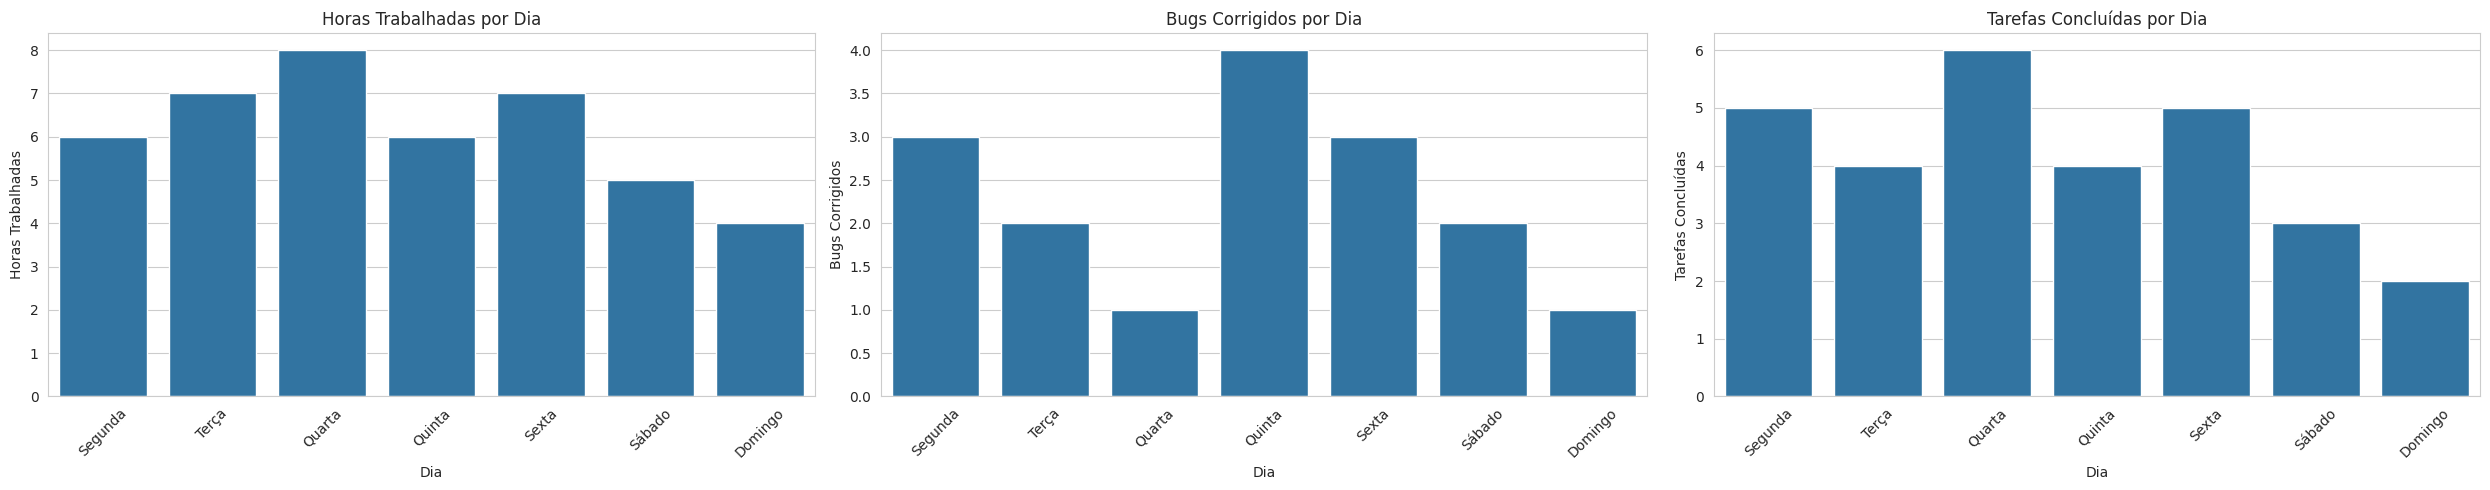

In [140]:
plots = [
    {'type': 'bar', 'x': 'Dia', 'y': 'Horas Trabalhadas', 'title': 'Horas Trabalhadas por Dia', 'xlabel': 'Dia', 'ylabel': 'Horas Trabalhadas'},
    {'type': 'bar', 'x': 'Dia', 'y': 'Bugs Corrigidos', 'title': 'Bugs Corrigidos por Dia', 'xlabel': 'Dia', 'ylabel': 'Bugs Corrigidos'},
    {'type': 'bar', 'x': 'Dia', 'y': 'Tarefas Concluídas', 'title': 'Tarefas Concluídas por Dia', 'xlabel': 'Dia', 'ylabel': 'Tarefas Concluídas'}
]

visualization = DataVisualization(df, plots, figsize=(25, 5))
visualization.plot()
visualization.show_plots()

### 📉 Gráficos Burndown
Os gráficos burndown revelam uma variação significativa nas horas trabalhadas ao longo da semana, com um pico na quarta-feira e uma queda subsequente até domingo. Esta variação reflete o cansaço dos desenvolvedores, com um leve aumento na sexta-feira antes do declínio no fim de semana. A análise da produtividade horária reforça a necessidade de equilibrar a carga de trabalho para manter uma eficiência constante e evitar a fadiga

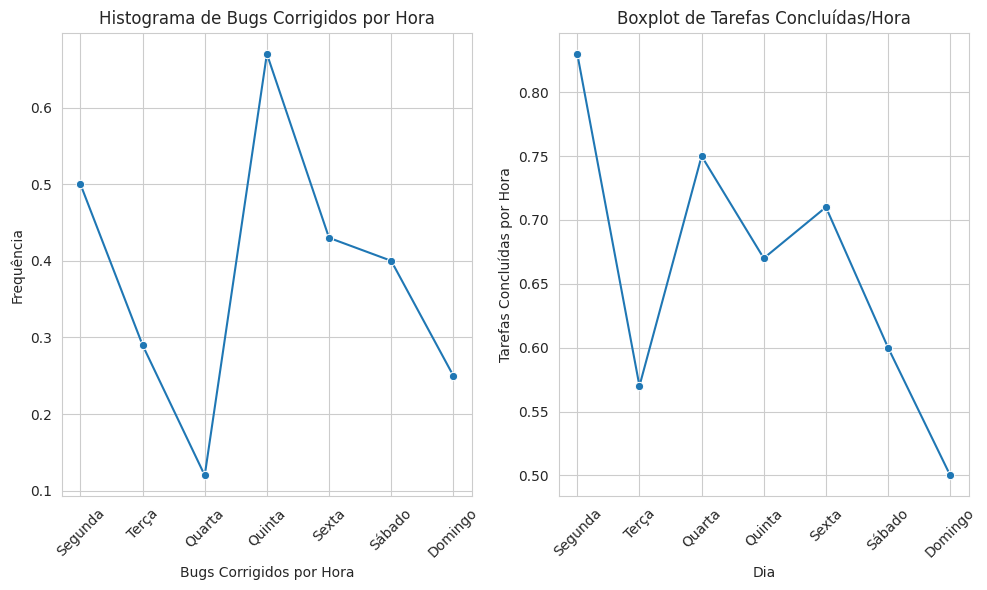

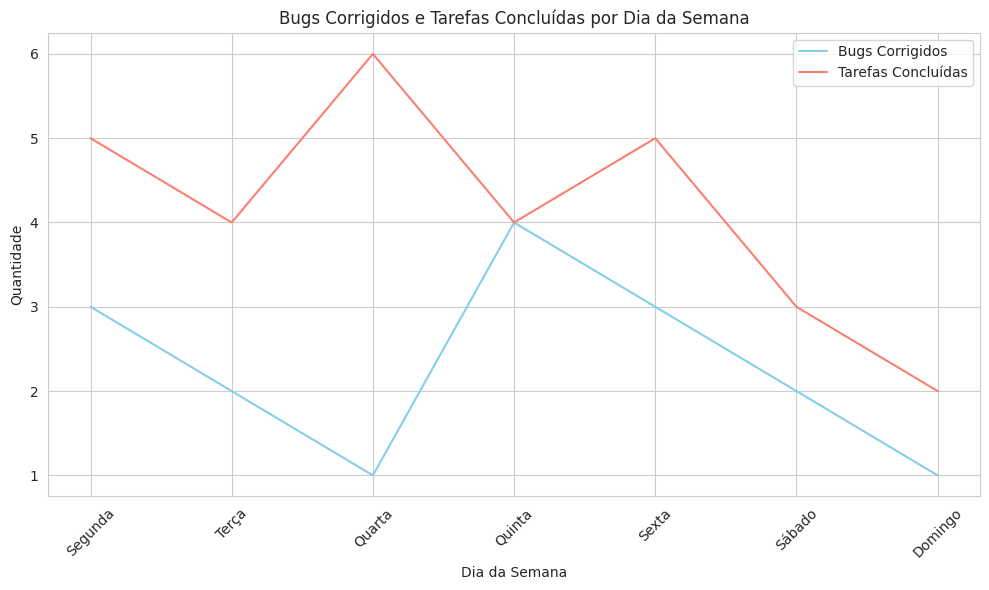

In [141]:
plots = [
    {'type': 'line', 'x': 'Dia', 'y':'Bugs Corrigidos por Hora', 'title': 'Histograma de Bugs Corrigidos por Hora', 'xlabel': 'Bugs Corrigidos por Hora', 'ylabel': 'Frequência'},
    {'type': 'line', 'x': 'Dia', 'y': 'Tarefas Concluídas por Hora', 'title': 'Boxplot de Tarefas Concluídas/Hora', 'xlabel': 'Dia', 'ylabel': 'Tarefas Concluídas por Hora'}
]

visualization = DataVisualization(df, plots, figsize=(10, 6))
visualization.plot()
visualization.show_plots()

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x='Dia', y='Bugs Corrigidos', data=df, color='skyblue', label='Bugs Corrigidos', markers='o')
sns.lineplot(x='Dia', y='Tarefas Concluídas', data=df, color='salmon', label='Tarefas Concluídas', markers='o')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade')
plt.title('Bugs Corrigidos e Tarefas Concluídas por Dia da Semana')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### ⁉ Perguntas e Respostas



In [142]:
print(f"Total de Horas Trabalhadas: {df['Horas Trabalhadas'].sum()} horas\n"
      f"Média de Horas Trabalhadas: {df['Horas Trabalhadas'].mean():.2f} horas\n"
      f"Total de Bugs Corrigidos: {df['Bugs Corrigidos'].sum()}\n"
      f"Média Diária de Bugs Corrigidos: {df['Bugs Corrigidos'].mean():.2f}\n"
      f"Total de Tarefas Concluídas: {df['Tarefas Concluídas'].sum()}\n"
      f"Média Diária de Tarefas Concluídas: {df['Tarefas Concluídas'].mean():.2f}\n"
      f"Produtividade Diária (Tarefas Concluídas por Hora): {df['Tarefas Concluídas por Hora'].mean():.2f}")


Total de Horas Trabalhadas: 43 horas
Média de Horas Trabalhadas: 6.14 horas
Total de Bugs Corrigidos: 16
Média Diária de Bugs Corrigidos: 2.29
Total de Tarefas Concluídas: 29
Média Diária de Tarefas Concluídas: 4.14
Produtividade Diária (Tarefas Concluídas por Hora): 0.66


### ✅ Conclusão
O relatório destaca a importância de uma análise detalhada dos dados de desempenho da equipe de desenvolvimento. A carga horária abaixo do padrão, a variação na produtividade diária e o foco em novas funcionalidades em detrimento da correção de bugs são pontos críticos que precisam ser abordados. Para melhorar o desempenho e a qualidade do produto, recomenda-se um equilíbrio melhor na carga de trabalho, priorização adequada de tarefas e monitoramento constante das métricas de produtividade. Isso ajudará a manter a equipe motivada e eficiente, garantindo ao mesmo tempo uma experiência de usuário satisfatória.